# Taller: Credit Scoring

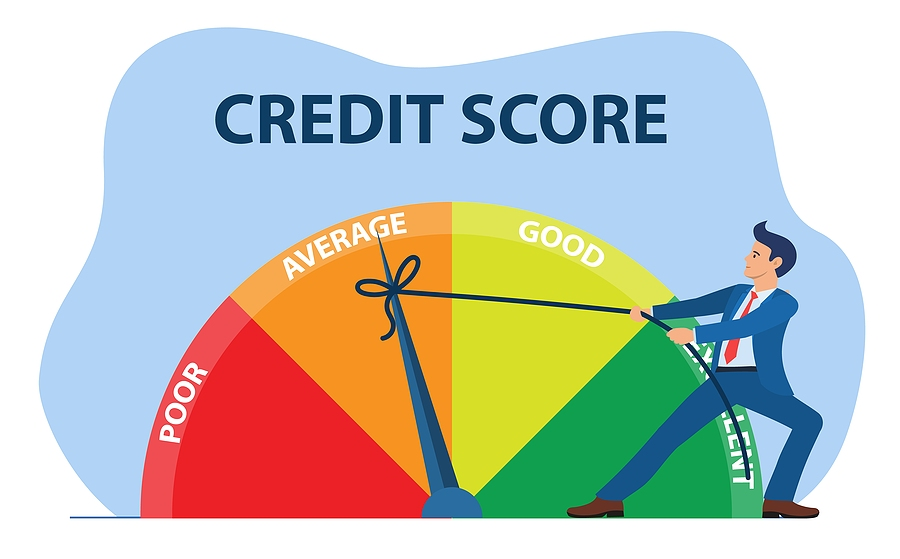

# Paquetes

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

## Descripción del Caso de Credit Scoring

### Contexto
El análisis de credit scoring se enfoca en evaluar la capacidad crediticia de los clientes a partir de sus ingresos, nivel de deuda, edad y antecedentes de mora. La base de datos contiene información de 985 clientes, y se busca entender cómo estos factores influyen en el riesgo crediticio.


### Datos

- **Ingreso**: Ingreso medio mensual, del ultimo año, declarado por el usuario.

- **Nivel_Deuda**: Porcentaje de deuda de crédito respecto a la línea de crédito total aprobada para el usuario

- **Edad**: La edad de los clientes considerando fracciones de año.

- **Mora**: Variable binaria que indica si el cliente incumplio en algun momento los terminos del contrato (1) o si siempre pago a tiempo (0).

In [259]:
df = pd.read_csv("score_credit.csv")

In [260]:
df.head()

,Ingreso,Nivel_Deuda,Nivel_Estudios,Edad,Mora
0,2252.0,62.847935,4. Universitaria,59,0
1,2569.0,56.066195,4. Universitaria,50,0
2,2176.0,43.709005,4. Universitaria,47,0
3,1738.0,33.615189,4. Universitaria,28,1
4,2617.0,52.831762,5. Post grado,39,0


In [261]:
df.describe()

,Ingreso,Nivel_Deuda,Edad,Mora
count,985.000000,985.000000,985.000000,985.000000
mean,2485.096447,43.919190,43.647716,0.127919
std,486.606293,14.207579,8.236393,0.334169
min,574.000000,0.851593,18.000000,0.000000
25%,2174.000000,34.254113,38.000000,0.000000
50%,2487.000000,43.814153,43.000000,0.000000
75%,2819.000000,53.251851,49.000000,0.000000
max,3848.000000,88.472964,67.000000,1.000000


### Objetivo
El objetivo es desarrollar un modelo de credit scoring que permita predecir la probabilidad de mora de un cliente basado en su ingreso, nivel de deuda y edad. El análisis buscará identificar patrones y relaciones entre estas variables y el historial de mora para mejorar la precisión en la evaluación del riesgo crediticio.

### Metodología
1. **Exploración de Datos**: Realizar un análisis descriptivo de las variables para entender su distribución y correlación.
2. **Preprocesamiento**: Limpiar y preparar los datos, manejando valores faltantes y normalizando variables si es necesario.
3. **Modelado**: Aplicar técnicas de modelado como regresión logística o árboles de decisión para predecir la probabilidad de mora.
4. **Evaluación**: Evaluar el modelo utilizando métricas de desempeño como precisión, recall y AUC-ROC.

# **Exploración de Datos**

## Analisis univariado

<Axes: >

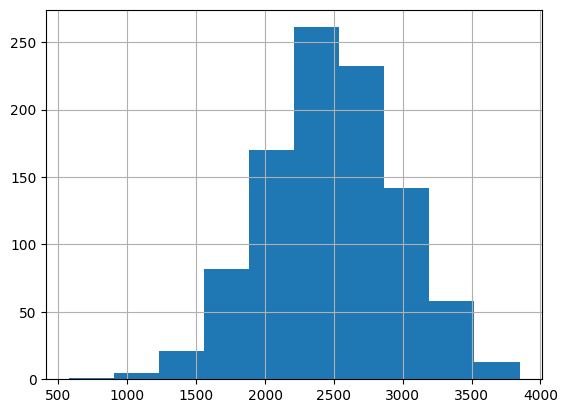

In [262]:
df.Ingreso.hist()

<Axes: >

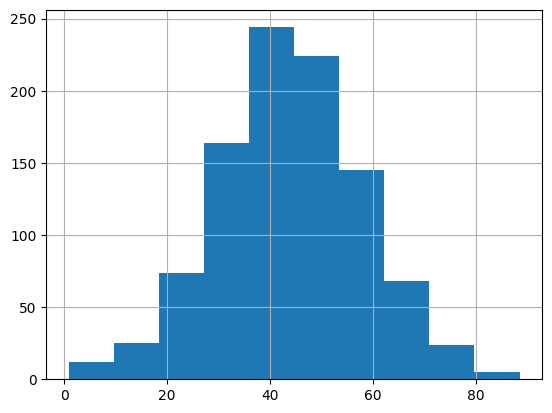

In [263]:
df.Nivel_Deuda.hist()

<Axes: >

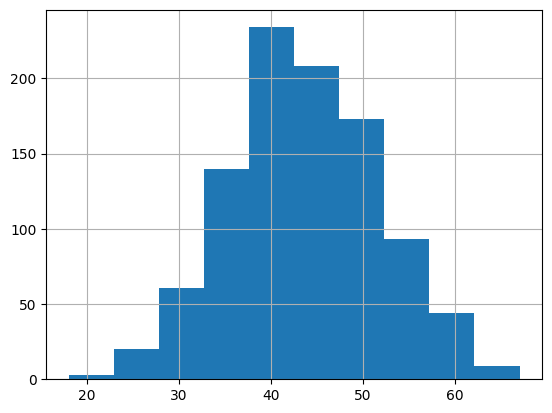

In [264]:
df.Edad.hist()

<Axes: ylabel='count'>

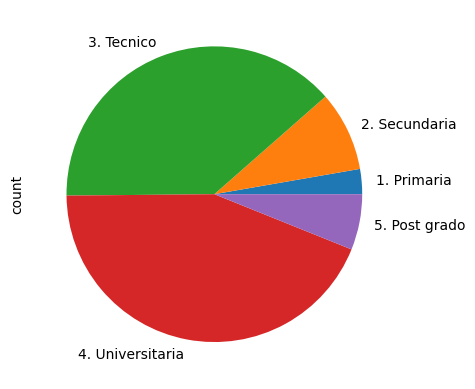

In [265]:
df.Nivel_Estudios.value_counts().sort_index().plot(kind='pie')

## Analisis Bivariado

In [266]:
df.pivot_table(index='Edad',columns='Nivel_Estudios',values='Mora',aggfunc='count')

Nivel_Estudios,1. Primaria,2. Secundaria,3. Tecnico,4. Universitaria,5. Post grado
Edad,,,,,
18,NaN,NaN,2.0,NaN,NaN
21,NaN,NaN,1.0,NaN,NaN
23,NaN,NaN,1.0,NaN,NaN
24,NaN,NaN,1.0,NaN,NaN
25,1.0,NaN,3.0,2.0,NaN
26,NaN,NaN,2.0,1.0,NaN
27,NaN,1.0,3.0,4.0,1.0
28,NaN,1.0,5.0,6.0,NaN
29,NaN,NaN,4.0,4.0,1.0


<Axes: xlabel='Edad'>

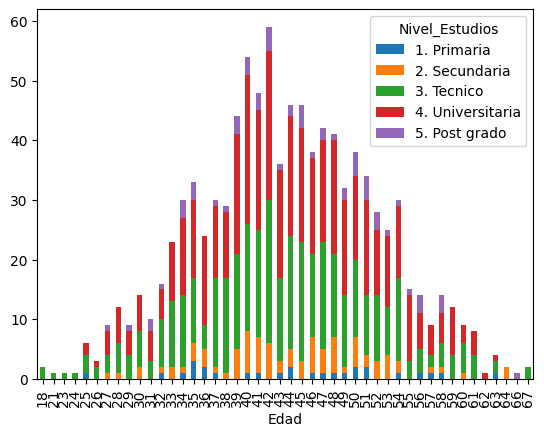

In [267]:
df.pivot_table(index='Edad',columns='Nivel_Estudios',values='Mora',aggfunc='count').plot(kind='bar',stacked=True)

<Axes: xlabel='Edad'>

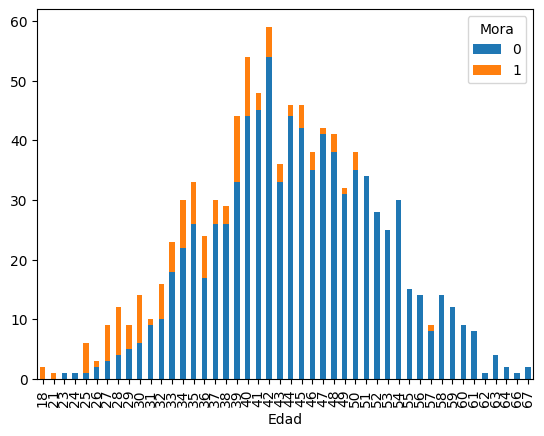

In [268]:
df.pivot_table(index='Edad',columns='Mora',values='Ingreso',aggfunc='count').plot(kind='bar',stacked=True)

# **Preprocesamiento**

## Rango de ingreso

In [269]:
def rango_ingreso(x):
  if x <= 1500:
    y = "1. [0 - 1500]"
  elif x <= 2500:
    y = "2. [1500 - 2500]"
  else:
    y = "3. [2500 - +]"
  return y

In [270]:
df['Rango_Ingreso'] = df['Ingreso'].map(rango_ingreso)

In [271]:
df.pivot_table(index='Rango_Ingreso',values='Mora',aggfunc='mean')

,Mora
Rango_Ingreso,
1. [0 - 1500],0.416667
2. [1500 - 2500],0.197917
3. [2500 - +],0.043659


<Axes: xlabel='Rango_Ingreso'>

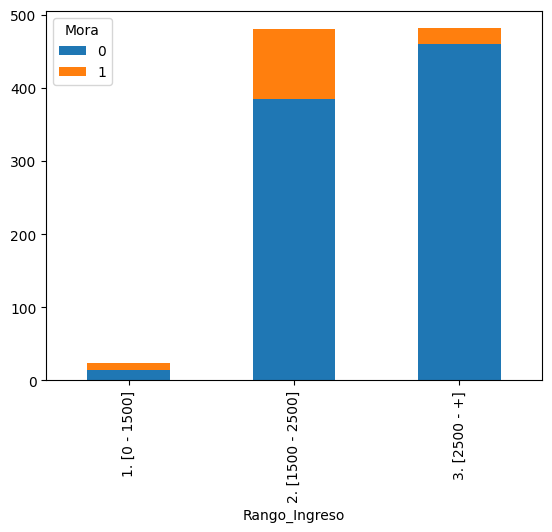

In [272]:
df.pivot_table(index='Rango_Ingreso',columns='Mora',values='Ingreso',aggfunc='count').plot(kind='bar',stacked=True)

In [273]:
df.pivot_table(index='Nivel_Estudios',values='Mora',aggfunc='mean')

,Mora
Nivel_Estudios,
1. Primaria,0.185185
2. Secundaria,0.162791
3. Tecnico,0.162730
4. Universitaria,0.099768
5. Post grado,0.033333


<Axes: xlabel='Nivel_Estudios'>

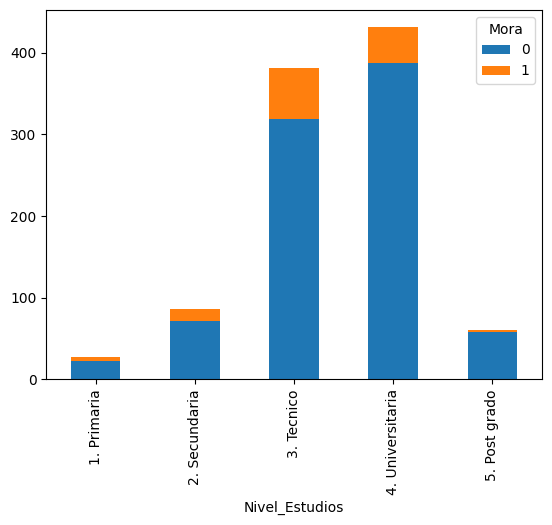

In [274]:
df.pivot_table(index='Nivel_Estudios',columns='Mora',values='Ingreso',aggfunc='count').plot(kind='bar',stacked=True)

# 3. **Modelado**

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [276]:
x_vars = ['Ingreso', 'Nivel_Deuda', 'Nivel_Estudios', 'Edad']
y_var = ['Mora']

In [277]:
modelo_arbol = DecisionTreeClassifier(max_depth=3)

## Creando variables dummy

In [278]:
X = pd.get_dummies(df[x_vars])
X

,Ingreso,Nivel_Deuda,Edad,Nivel_Estudios_1. Primaria,Nivel_Estudios_2. Secundaria,Nivel_Estudios_3. Tecnico,Nivel_Estudios_4. Universitaria,Nivel_Estudios_5. Post grado
0,2252.0,62.847935,59,False,False,False,True,False
1,2569.0,56.066195,50,False,False,False,True,False
2,2176.0,43.709005,47,False,False,False,True,False
3,1738.0,33.615189,28,False,False,False,True,False
4,2617.0,52.831762,39,False,False,False,False,True
...,...,...,...,...,...,...,...,...
980,2641.0,58.145003,43,False,False,True,False,False
981,1601.0,42.478268,60,False,False,True,False,False
982,2180.0,30.258934,46,False,False,False,True,False
983,2786.0,40.527615,30,False,False,True,False,False


In [279]:
arbol = modelo_arbol.fit(X,df[y_var])

## Visualizacion de arboles

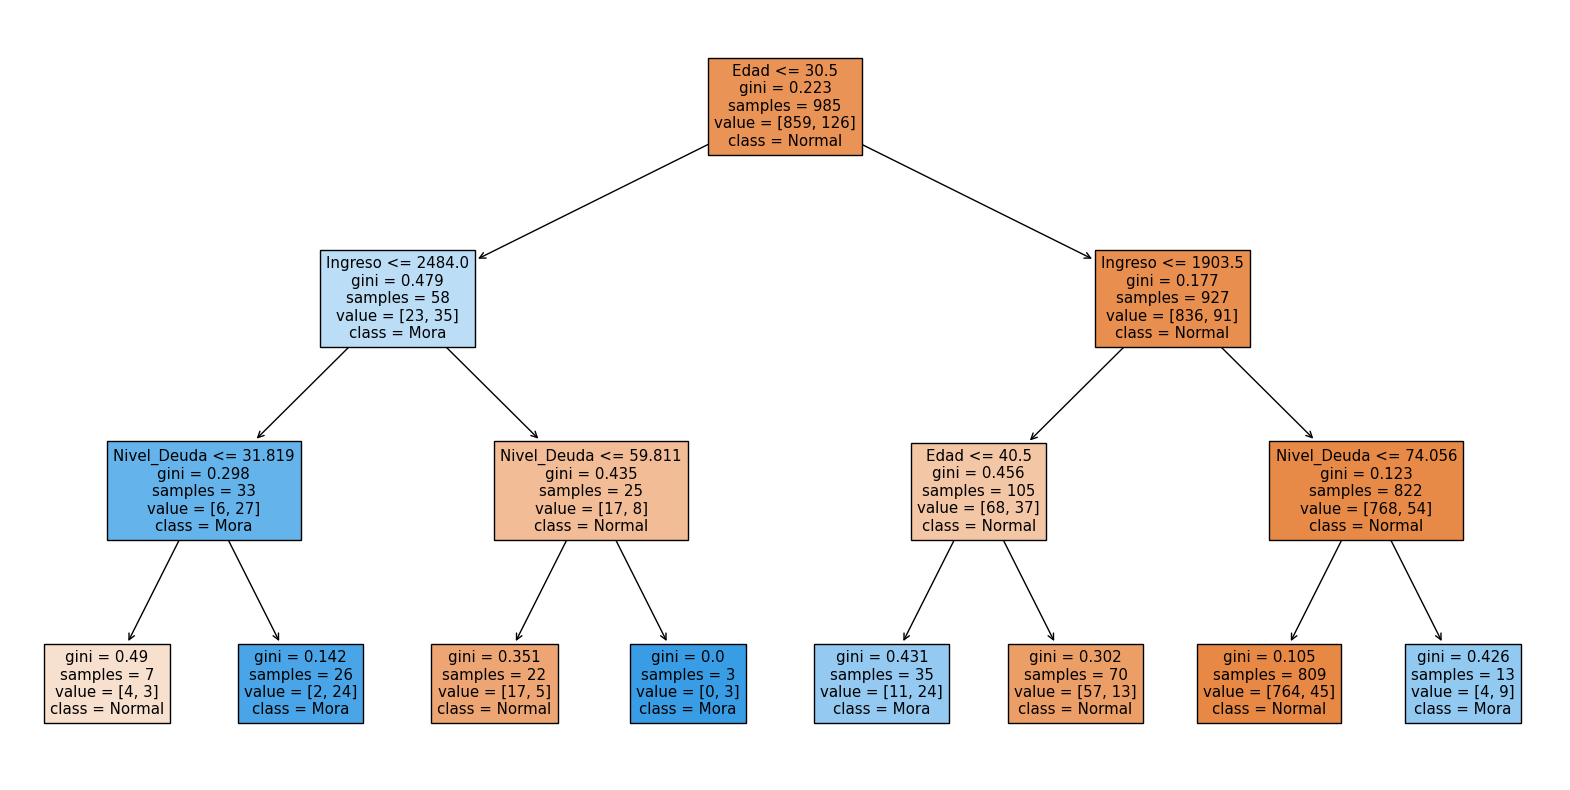

In [280]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura
plot_tree(modelo_arbol, feature_names=X.columns, class_names=['Normal', 'Mora'], filled=True)
plt.show()

## Optimizacion de parametros

In [281]:
lac = []

In [282]:
for i in range(1,15):
    arbol = DecisionTreeClassifier(max_depth=i).fit(X,df[y_var])
    y_pred = arbol.predict(X)
    accuracy = skl.metrics.accuracy_score(df[y_var], y_pred)
    lac.append(accuracy)

In [283]:
result1 = pd.DataFrame({'accuracy':lac},index=range(1,15))

<Axes: >

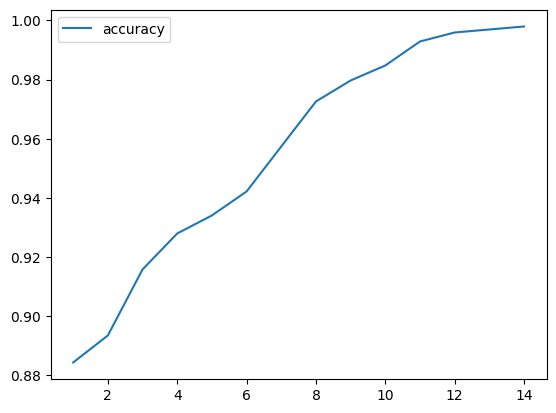

In [284]:
result1.plot()

## Particion de datos

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, df[y_var], test_size=0.3, random_state=330)

In [286]:
lac = []
lac2 = []

In [287]:
for i in range(1,15):
    arbol = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    y_pred = arbol.predict(X_test)
    accuracy = skl.metrics.accuracy_score(y_test, y_pred)
    y_pred2 = arbol.predict(X_train)
    accuracy2 = skl.metrics.accuracy_score(y_train, y_pred2)
    precision = skl.metrics.precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = skl.metrics.recall_score(y_test, y_pred, average='weighted',zero_division=0)
    f1 = skl.metrics.f1_score(y_test, y_pred, average='weighted')
    lac.append(accuracy)
    lac2.append(accuracy2)

In [288]:
result = pd.DataFrame({'accuracy_test':lac,'accuracy_train':lac2},index=range(1,15))

<Axes: >

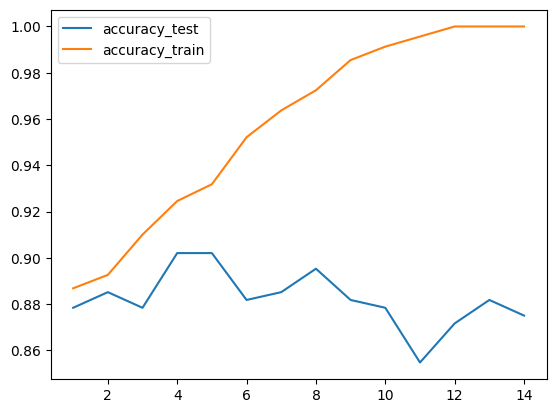

In [289]:
result.plot()

## Modelo de Random Forest

In [290]:
lac1 = []
lac2 = []
depth = []
estim = []

In [291]:
for i in range(1,15):
    for nest in [5,10,15]:
        arbol = RandomForestClassifier(max_depth=i,n_estimators=nest, random_state=333).fit(X_train,y_train)
        y_pred = arbol.predict(X_test)
        accuracy = skl.metrics.accuracy_score(y_test, y_pred)
        y_pred2 = arbol.predict(X_train)
        accuracy2 = skl.metrics.accuracy_score(y_train, y_pred2)
        lac1.append(accuracy)
        lac2.append(accuracy2)
        depth.append(i)
        estim.append(nest)

In [292]:
result2 = pd.DataFrame({'test':lac1,'train':lac2,'depth':depth,'estim':estim})

<Axes: xlabel='depth'>

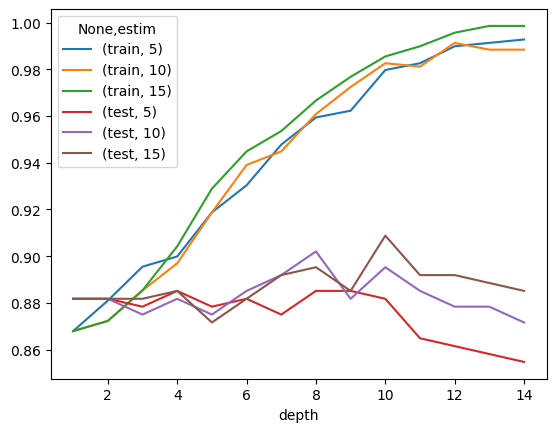

In [293]:
result2.pivot(index='depth', columns='estim', values=['train', 'test']).plot()

La combinacion optima son 5 arboles de profundidad 3

## Evaluacion de modelos optimos

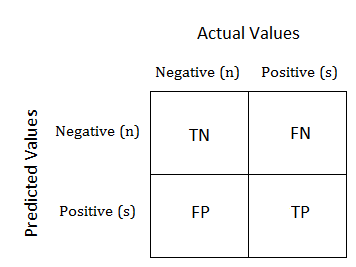

In [294]:
modelo_arbol = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
modelo_forest = RandomForestClassifier(max_depth=8,n_estimators=10).fit(X_train,y_train)

### Modelo de arbol

In [295]:
y_pred = modelo_arbol.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       261
           1       0.44      0.11      0.18        35

    accuracy                           0.88       296
   macro avg       0.67      0.55      0.56       296
weighted avg       0.84      0.88      0.85       296



In [296]:
pd.crosstab(y_test.Mora , y_pred,margins=True)

col_0,0,1,All
Mora,,,
0,256,5,261
1,31,4,35
All,287,9,296


In [297]:
y_pred_proba = modelo_arbol.predict_proba(X_test)[:, 1]

In [298]:
# Evaluación del modelo
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.7795840175150519


In [299]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
specificity = 1 - fpr
sensitivity = tpr

sum_sensitivity_specificity = sensitivity + specificity
best_threshold_index = np.argmax(sum_sensitivity_specificity)
optimal_threshold = thresholds[best_threshold_index]

print(f'Punto óptimo de corte: {optimal_threshold}')

Punto óptimo de corte: 0.16666666666666666


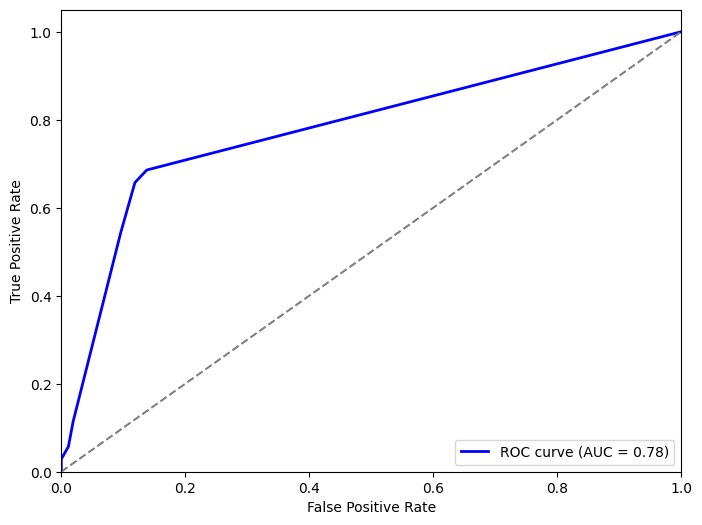

In [300]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [301]:
y_pred2 = modelo_arbol.predict_proba(X_test)[:, 1]
y_pred2 = np.where( y_pred2>optimal_threshold, 1, 0)
print(classification_report(y_test, y_pred2))
report = classification_report(y_test, y_pred2, output_dict=True)
pd.crosstab(y_test.Mora, y_pred2,margins=True)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       261
           1       0.43      0.66      0.52        35

    accuracy                           0.85       296
   macro avg       0.69      0.77      0.72       296
weighted avg       0.89      0.85      0.87       296



col_0,0,1,All
Mora,,,
0,230,31,261
1,12,23,35
All,242,54,296


### Modelo de random forest

In [302]:
y_pred = modelo_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       261
           1       0.53      0.26      0.35        35

    accuracy                           0.89       296
   macro avg       0.72      0.61      0.64       296
weighted avg       0.86      0.89      0.87       296



In [303]:
pd.crosstab(y_test.Mora , y_pred,margins=True)

col_0,0,1,All
Mora,,,
0,253,8,261
1,26,9,35
All,279,17,296


In [304]:
y_pred_proba = modelo_forest.predict_proba(X_test)[:, 1]

In [305]:
# Evaluación del modelo
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.913136288998358


In [306]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
specificity = 1 - fpr
sensitivity = tpr

sum_sensitivity_specificity = sensitivity + specificity
best_threshold_index = np.argmax(sum_sensitivity_specificity)
optimal_threshold = thresholds[best_threshold_index]

print(f'Punto óptimo de corte: {optimal_threshold}')

Punto óptimo de corte: 0.15773123489111573


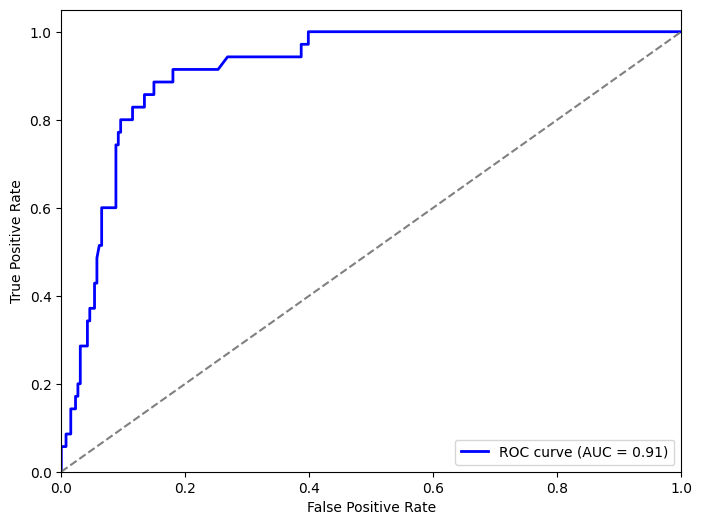

In [307]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [308]:
y_pred2 = modelo_forest.predict_proba(X_test)[:, 1]
y_pred2 = np.where( y_pred2>optimal_threshold, 1, 0)
print(classification_report(y_test, y_pred2))
report = classification_report(y_test, y_pred2, output_dict=True)
pd.crosstab(y_test.Mora, y_pred2,margins=True)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       261
           1       0.43      0.86      0.58        35

    accuracy                           0.85       296
   macro avg       0.71      0.85      0.74       296
weighted avg       0.91      0.85      0.87       296



col_0,0,1,All
Mora,,,
0,222,39,261
1,5,30,35
All,227,69,296


In [309]:
score = (1-modelo_forest.predict_proba(X_test)[:, 1])*1000
result3 = pd.DataFrame({'score':score,'Mora':y_test.Mora})

<Axes: ylabel='Density'>

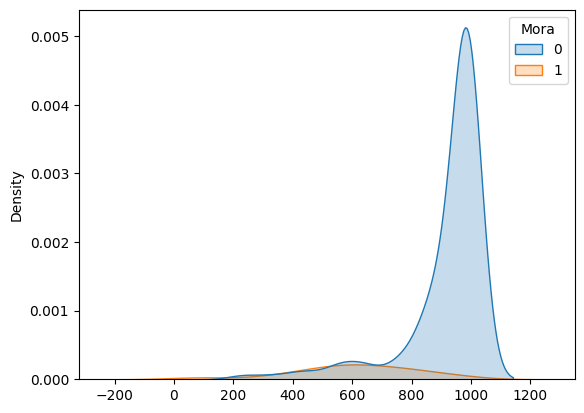

In [310]:
sns.kdeplot(result3,x=score,hue='Mora', fill=True, common_norm=True)

In [311]:
from scipy.stats import gaussian_kde

In [312]:
def plot_kde(data, ax, color, label):
    kde = gaussian_kde(data, bw_method='scott')
    x = np.linspace(data.min(), data.max(), 1000)
    y = kde(x)
    y /= y.sum()  # Normaliza para que el área total sea 1
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, y, alpha=0.3, color=color)
    ax.set_title(f'Densidad para del score segun Mora')
    ax.set_xlabel('Score')
    ax.set_ylabel('Densidad')
    ax.legend()

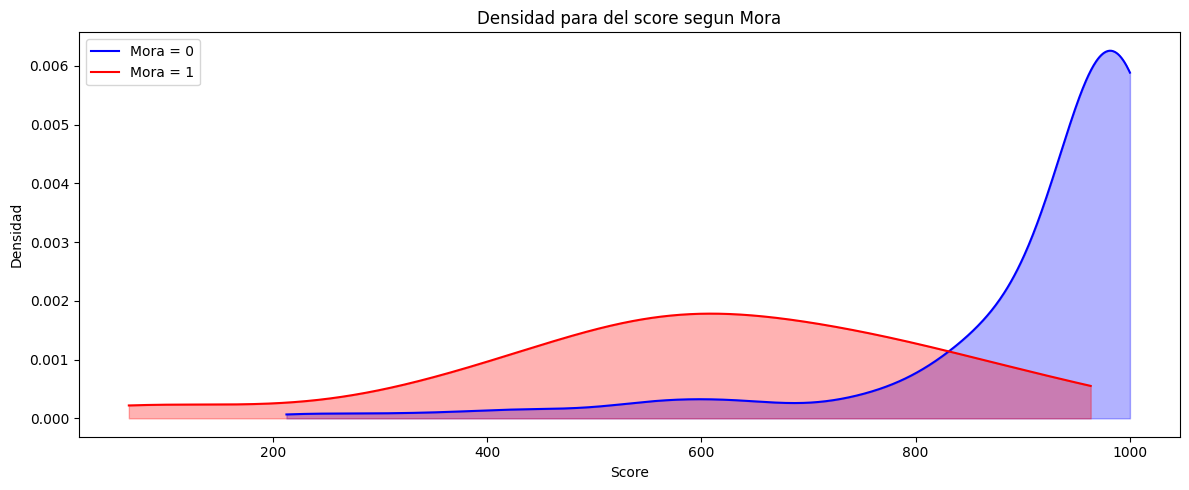

In [313]:
data_mora_0 = result3[result3['Mora'] == 0]['score']
data_mora_1 = result3[result3['Mora'] == 1]['score']

fig, ax = plt.subplots(figsize=(12, 5))
plot_kde(data_mora_0, ax, 'blue', 'Mora = 0')
plot_kde(data_mora_1, ax, 'red', 'Mora = 1')

plt.tight_layout()
plt.show()

In [314]:
def hist_fill_p(y_test,scaled_scores):
    fig, ax = plt.subplots(1,2,figsize=(12,4.5))
    bins = np.percentile(scaled_scores, np.arange(0, 100.1, 5))
    rangos = pd.cut(scaled_scores,bins=bins, duplicates='drop')
    df_hist = pd.DataFrame({'score':scaled_scores,'MORA':y_test,'rangos':rangos})
    row_sums = df_hist.pivot_table(index='rangos', columns='MORA', values='score',aggfunc='count').sum(axis=1)
    df_hist.pivot_table(index='rangos', columns='MORA', values='score',aggfunc='count').plot(kind='bar',stacked=True,ax=ax[0])
    df_hist.pivot_table(index='rangos', columns='MORA', values='score',aggfunc='count').div(row_sums, axis=0).plot(kind='bar',stacked=True,ax=ax[1])

In [315]:
df['score'] = (1-modelo_forest.predict_proba(X)[:, 1])*1000

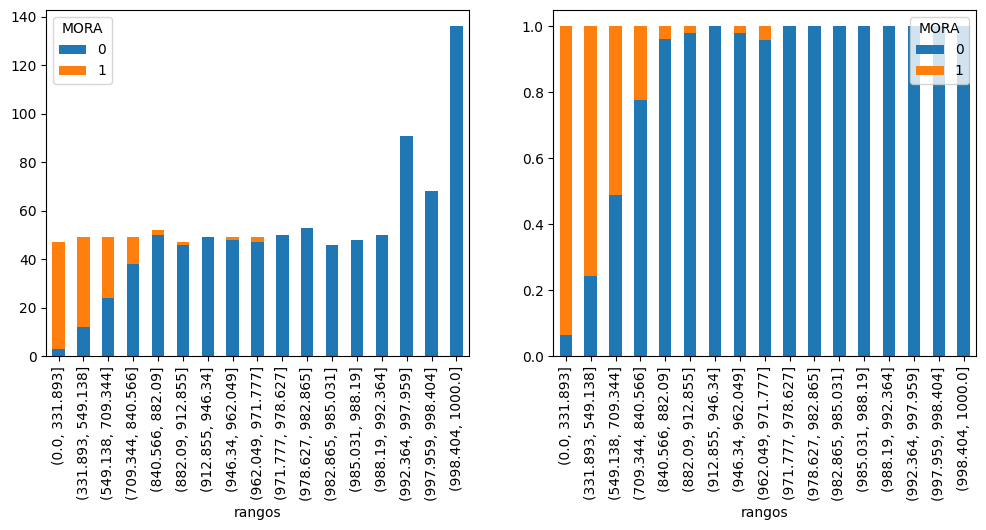

In [316]:
hist_fill_p(df['Mora'],df['score'])